# Task 3
## Iris flower classification

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix,r2_score

In [2]:
df = pd.read_csv('IRIS.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

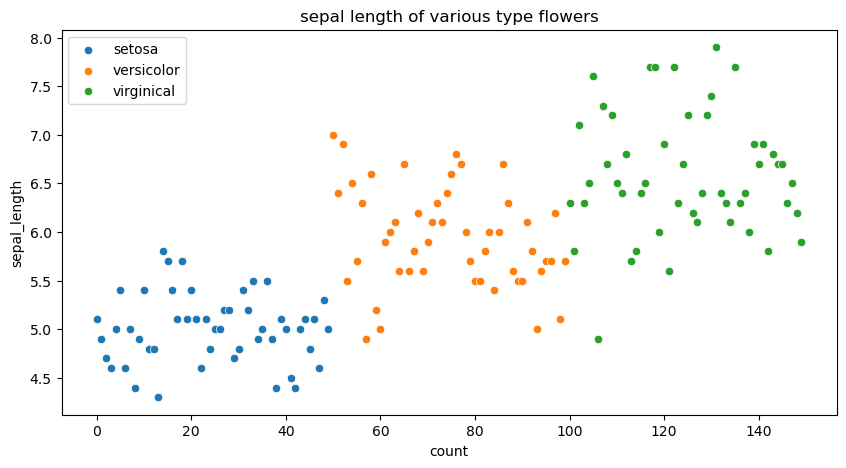

In [5]:
plt.figure(figsize=(10,5))
data_setosa=df[df["species"]=="Iris-setosa"]
data_versicolor=df[df["species"]=="Iris-versicolor"]
data_virginica=df[df["species"]=="Iris-virginica"]


plt.title("sepal length of various type flowers")
sns.scatterplot(data_setosa["sepal_length"],label="setosa")
sns.scatterplot(data_versicolor["sepal_length"],label="versicolor")
sns.scatterplot(data_virginica["sepal_length"],label="virginical")
plt.xlabel("count")
plt.show()

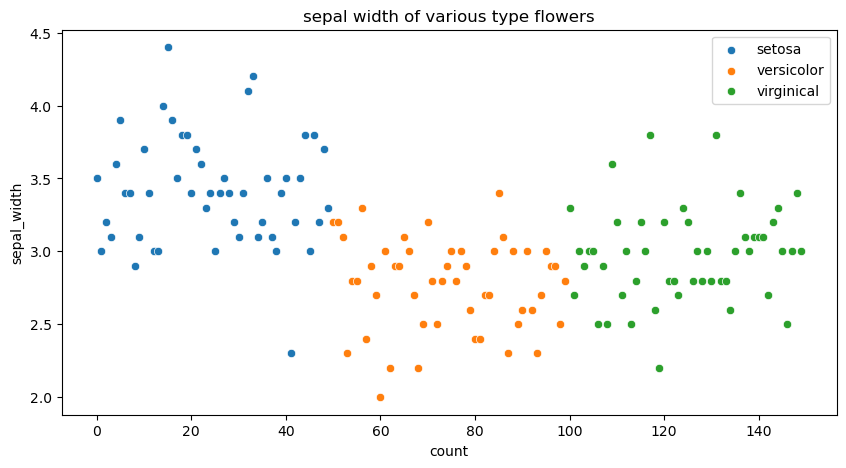

In [6]:
plt.figure(figsize=(10,5))
data_setosa=df[df["species"]=="Iris-setosa"]
data_versicolor=df[df["species"]=="Iris-versicolor"]
data_virginica=df[df["species"]=="Iris-virginica"]


plt.title("sepal width of various type flowers")
sns.scatterplot(data_setosa["sepal_width"],label="setosa")
sns.scatterplot(data_versicolor["sepal_width"],label="versicolor")
sns.scatterplot(data_virginica["sepal_width"],label="virginical")
plt.xlabel("count")
plt.show()

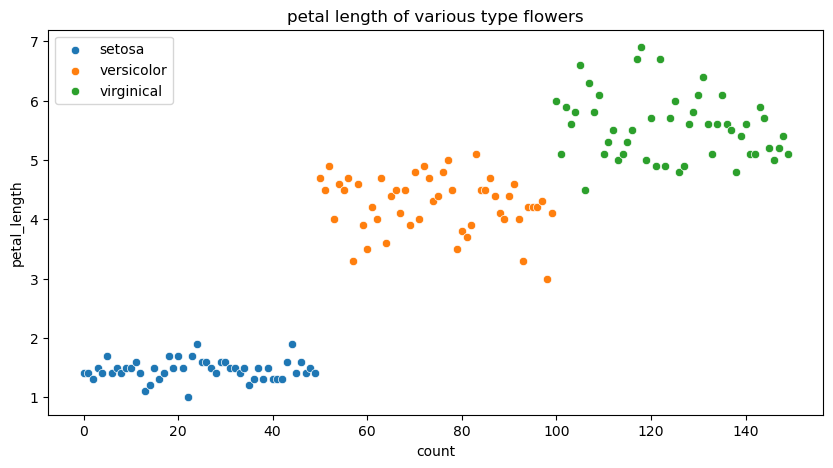

In [7]:
plt.figure(figsize=(10,5))
data_setosa=df[df["species"]=="Iris-setosa"]
data_versicolor=df[df["species"]=="Iris-versicolor"]
data_virginica=df[df["species"]=="Iris-virginica"]


plt.title("petal length of various type flowers")
sns.scatterplot(data_setosa["petal_length"],label="setosa")
sns.scatterplot(data_versicolor["petal_length"],label="versicolor")
sns.scatterplot(data_virginica["petal_length"],label="virginical")
plt.xlabel("count")
plt.show()

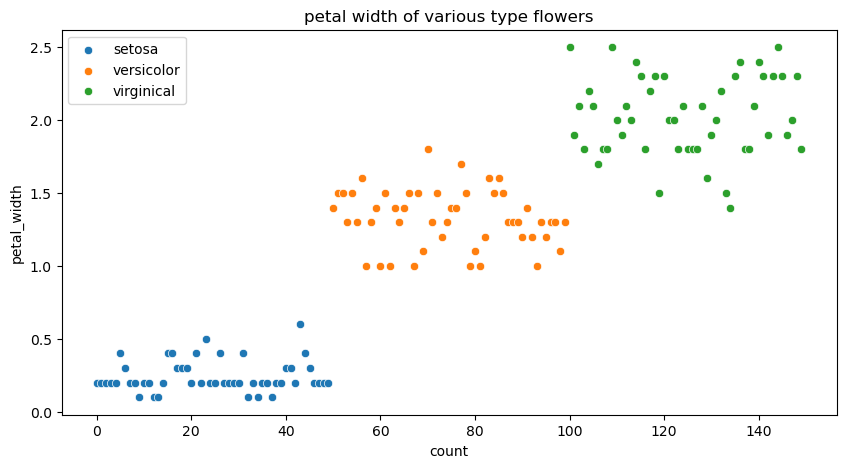

In [8]:
plt.figure(figsize=(10,5))
data_setosa=df[df["species"]=="Iris-setosa"]
data_versicolor=df[df["species"]=="Iris-versicolor"]
data_virginica=df[df["species"]=="Iris-virginica"]


plt.title("petal width of various type flowers")
sns.scatterplot(data_setosa["petal_width"],label="setosa")
sns.scatterplot(data_versicolor["petal_width"],label="versicolor")
sns.scatterplot(data_virginica["petal_width"],label="virginical")
plt.xlabel("count")
plt.show()

In [9]:
X = df.drop("species", axis=1)
y = df[["species"]]
X.shape

(150, 4)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 0)

In [11]:
dt = DecisionTreeClassifier(max_depth = 2, random_state=1)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=1)

In [12]:
print("Training Accuracy is: ", dt.score(X_train, y_train))
print("Testing Accuracy is: ", dt.score(X_test, y_test))

Training Accuracy is:  0.9583333333333334
Testing Accuracy is:  0.9666666666666667


In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
knn_clf = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2) # Euclidean Distance Metric
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)
print(classification_report(y_test, y_pred))
print("Train Accuracy: ", accuracy_score(y_train, knn_clf.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

Train Accuracy:  0.95
Test Accuracy:  0.9666666666666667


C:\Users\vikjh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
